# <div style="text-align: center; color: #1a5276;">Advanced Training</div>

## <font color='blue'>  Table of Contents </font>

1. [Introduction](#1)
2. [Setup](#2)
3. [Helper Functions](#3) 
4. [Data](#4) 
5. [Model](#5)
6. [Training](#6) <br>
    6.1. [Basic Training](#6.1) <br>
    6.2. [Including a progress bar](#6.2) <br>
    6.3. [Including a validation set and a custom metric](#6.3) <br>
    6.4. [Code improvement](#6.4) <br>
8. [References](#references)

<a name="1"></a>
## <font color='blue'> 1. Introduction </font>

https://gemini.google.com/app/c49f12a5fb1aef13?hl=es

<a name="2"></a>
## <font color='blue'> 2. Setup </font>

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

<a name="3"></a>
## <font color='blue'> 3. Data </font>

In [2]:
# binary data
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset

# Synthetic binary data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=0)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)

# Split: 70% train, 15% val, 15% test
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=0)

train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=32, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val, y_val), batch_size=32)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=32)

In [3]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader
import torch

# 1. Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=0)

# 2. Split data before scaling
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=0)

# 3. Fit scaler on training data only
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)   # Fit + transform train
X_val = scaler.transform(X_val)           # Transform val only
X_test = scaler.transform(X_test)         # Transform test only

# 4. Convert to torch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)

X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.long)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

# 5. Create DataLoaders
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=32, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val, y_val), batch_size=32)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=32)


### Model

In [12]:
import torch
import torch.nn as nn

# device once
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class BinaryClassifier(nn.Module):
    def __init__(self, input_dim=20, hidden=16, output_dim=2):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden),
            nn.ReLU(),
            nn.Linear(hidden, output_dim)
        )

    def forward(self, x):
        return self.net(x)

# instantiate two separate models
model1 = BinaryClassifier().to(DEVICE)
model2 = BinaryClassifier().to(DEVICE)




"""
# example: using CrossEntropyLoss (expects integer class labels 0 or 1)
criterion = nn.CrossEntropyLoss()

# dummy input and target
x = torch.randn(8, 20, device=DEVICE)          # batch of 8
y = torch.randint(0, 2, (8,), device=DEVICE)   # labels 0 or 1

logits1 = model1(x)  # shape (8,2)
loss1 = criterion(logits1, y)
"""

'\n# example: using CrossEntropyLoss (expects integer class labels 0 or 1)\ncriterion = nn.CrossEntropyLoss()\n\n# dummy input and target\nx = torch.randn(8, 20, device=DEVICE)          # batch of 8\ny = torch.randint(0, 2, (8,), device=DEVICE)   # labels 0 or 1\n\nlogits1 = model1(x)  # shape (8,2)\nloss1 = criterion(logits1, y)\n'

In [5]:
y_val

tensor([0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
        1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
        0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
        0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 1, 0, 1, 1])

### Simple training


que de momento incluye solo el entrenamiento y las metricas


In [6]:
def train_one_epoch(model, dataloader, criterion, optimizer, device, metric_fn):
    model.train()
    running_loss, running_metric, total_samples = 0.0, 0.0, 0

    for inputs, labels in dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        batch_size = labels.size(0)
        running_loss += loss.item() * batch_size
        running_metric += metric_fn(outputs, labels).item() * batch_size
        total_samples += batch_size

    return running_loss / total_samples, running_metric / total_samples if metric_fn else 0

In [7]:
def validate_one_epoch(model, dataloader, criterion, device, metric_fn=None):
    model.eval()
    running_loss, running_metric, total_samples = 0.0, 0.0, 0

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            batch_size = labels.size(0)
            running_loss += loss.item() * batch_size
            running_metric += metric_fn(outputs, labels).item() * batch_size
            total_samples += batch_size

    return running_loss / total_samples, running_metric / total_samples if metric_fn else 0

In [8]:
def train_model(
    model, train_loader, val_loader, test_loader,
    criterion, optimizer, device,
    metric_fn, epochs=10
):

    history = {'train_loss': [], 'val_loss': [], 'train_metric': [], 'val_metric': []}

    for epoch in range(1, epochs + 1):
        train_loss, train_metric = train_one_epoch(model, train_loader, criterion, optimizer, device, metric_fn)
        val_loss, val_metric = validate_one_epoch(model, val_loader, criterion, device, metric_fn)

        history['train_loss'].append(train_loss)
        history['val_loss'].append(val_loss)
        history['train_metric'].append(train_metric)
        history['val_metric'].append(val_metric)

        print(f"Epoch {epoch:02d} | Train Loss: {train_loss:.4f}, Metric: {train_metric:.4f} | "
              f"Val Loss: {val_loss:.4f}, Metric: {val_metric:.4f}")

    
    return model, history

test

In [10]:
model = BinaryClassifier().to(DEVICE)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
#scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=2)

def accuracy(outputs, labels):
    preds = torch.argmax(outputs, dim=1)
    return (preds == labels).float().mean()


In [13]:
# Train with test set evaluation
model, history = train_model(
    model, train_loader, val_loader, test_loader,
    criterion, optimizer, device,
    metric_fn=accuracy,
    epochs=10,
)

Epoch 01 | Train Loss: 0.5194, Metric: 0.8000 | Val Loss: 0.3028, Metric: 0.9533
Epoch 02 | Train Loss: 0.2105, Metric: 0.9329 | Val Loss: 0.1857, Metric: 0.9533
Epoch 03 | Train Loss: 0.1399, Metric: 0.9443 | Val Loss: 0.1819, Metric: 0.9467
Epoch 04 | Train Loss: 0.1177, Metric: 0.9600 | Val Loss: 0.1838, Metric: 0.9467
Epoch 05 | Train Loss: 0.1042, Metric: 0.9671 | Val Loss: 0.1927, Metric: 0.9400
Epoch 06 | Train Loss: 0.0933, Metric: 0.9743 | Val Loss: 0.2052, Metric: 0.9467
Epoch 07 | Train Loss: 0.0846, Metric: 0.9729 | Val Loss: 0.2001, Metric: 0.9400
Epoch 08 | Train Loss: 0.0749, Metric: 0.9800 | Val Loss: 0.2203, Metric: 0.9400
Epoch 09 | Train Loss: 0.0690, Metric: 0.9829 | Val Loss: 0.2277, Metric: 0.9533
Epoch 10 | Train Loss: 0.0607, Metric: 0.9829 | Val Loss: 0.2340, Metric: 0.9533


In [14]:
# Final test set evaluation (only once)
test_loss, test_metric = validate_one_epoch(model, test_loader, criterion, device, accuracy)
print(f"\nFinal Test Loss: {test_loss:.4f}, Test Metric: {test_metric:.4f}")



Final Test Loss: 0.1481, Test Metric: 0.9667


### Several metrics

primero a mano, después con torchmetrics

In [15]:
# --- 4. Define multiple metrics ---
def accuracy_fn(outputs, labels):
    preds = torch.argmax(outputs, dim=1)
    return (preds == labels).float().mean()

from sklearn.metrics import precision_score

def precision_fn(outputs, labels):
    preds = torch.argmax(outputs, dim=1).cpu().numpy()
    labels = labels.cpu().numpy()
    return torch.tensor(precision_score(labels, preds, average='binary'))  # or 'macro'

metrics = {
    "accuracy": accuracy_fn,
    "precision": precision_fn
}


In [16]:
def train_one_epoch(model, dataloader, criterion, optimizer, device, metrics):
    model.train()
    running_loss, total_samples = 0.0, 0
    metric_totals = {name: 0.0 for name in metrics} if metrics else {}

    for inputs, labels in dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        batch_size = labels.size(0)
        running_loss += loss.item() * batch_size
        total_samples += batch_size

        for name, fn in metrics.items():
            metric_totals[name] += fn(outputs, labels).item() * batch_size

    avg_loss = running_loss / total_samples
    avg_metrics = {name: total / total_samples for name, total in metric_totals.items()}

    return avg_loss, avg_metrics

In [17]:
def validate_one_epoch(model, dataloader, criterion, device, metrics=None):
    model.eval()
    running_loss, total_samples = 0.0, 0
    metric_totals = {name: 0.0 for name in metrics} if metrics else {}

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            batch_size = labels.size(0)
            running_loss += loss.item() * batch_size
            total_samples += batch_size

            for name, fn in metrics.items():
                metric_totals[name] += fn(outputs, labels).item() * batch_size

    avg_loss = running_loss / total_samples
    avg_metrics = {name: total / total_samples for name, total in metric_totals.items()}

    return avg_loss, avg_metrics

In [18]:
def train_model(
    model, train_loader, val_loader, test_loader,
    criterion, optimizer, device,
    metrics, epochs=10
):

    for epoch in range(1, epochs + 1):
        train_loss, train_metrics = train_one_epoch(model, train_loader, criterion, optimizer, device, metrics)
        val_loss, val_metrics = validate_one_epoch(model, val_loader, criterion, device, metrics)

        print(f"Epoch {epoch:02d} | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")
        for name in train_metrics:
            print(f"  Train {name}: {train_metrics[name]:.4f} | Val {name}: {val_metrics[name]:.4f}")


    return model, history

---> test

In [19]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model4 = BinaryClassifier().to(DEVICE)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model4.parameters(), lr=0.01)


In [20]:
# --- 7. Run ---
trained_model, history = train_model(
    model4,
    train_loader,
    val_loader,
    test_loader,
    criterion,
    optimizer,
    device,
    metrics=metrics,
)

Epoch 01 | Train Loss: 0.4944 | Val Loss: 0.2810
  Train accuracy: 0.8314 | Val accuracy: 0.9333
  Train precision: 0.8581 | Val precision: 0.9703
Epoch 02 | Train Loss: 0.1950 | Val Loss: 0.1681
  Train accuracy: 0.9343 | Val accuracy: 0.9533
  Train precision: 0.9353 | Val precision: 0.9732
Epoch 03 | Train Loss: 0.1325 | Val Loss: 0.1639
  Train accuracy: 0.9500 | Val accuracy: 0.9600
  Train precision: 0.9451 | Val precision: 0.9741
Epoch 04 | Train Loss: 0.1148 | Val Loss: 0.1630
  Train accuracy: 0.9586 | Val accuracy: 0.9533
  Train precision: 0.9703 | Val precision: 0.9732
Epoch 05 | Train Loss: 0.1004 | Val Loss: 0.1600
  Train accuracy: 0.9714 | Val accuracy: 0.9600
  Train precision: 0.9772 | Val precision: 0.9621
Epoch 06 | Train Loss: 0.0886 | Val Loss: 0.1705
  Train accuracy: 0.9786 | Val accuracy: 0.9533
  Train precision: 0.9810 | Val precision: 0.9732
Epoch 07 | Train Loss: 0.0822 | Val Loss: 0.1619
  Train accuracy: 0.9771 | Val accuracy: 0.9600
  Train precision: 0.

In [21]:
# Final test set evaluation (only once)
test_loss, test_metrics = validate_one_epoch(model, test_loader, criterion, device, metrics)
print(f"\nFinal Test Loss: {test_loss:.4f}, Test Metric: {test_metrics['accuracy']:.4f}")


Final Test Loss: 0.1481, Test Metric: 0.9667


with torchmetrics

In [22]:
#!pip install torchmetrics

In [23]:
from torchmetrics.classification import BinaryAccuracy, BinaryPrecision

# 4. Metric setup (torchmetrics)
metrics = {
    "accuracy": BinaryAccuracy().to(device), # necesita que le pase el argmax; poner como nota luego
    "precision": BinaryPrecision().to(device)
}

def reset_metrics(metrics):
    for metric in metrics.values():
        metric.reset()

def compute_metrics(metrics, preds, labels):
    results = {}
    for name, metric in metrics.items():
        metric.update(preds, labels)
    for name, metric in metrics.items():
        results[name] = metric.compute().item()
    return results


########################################################################


from torchmetrics.classification import Accuracy, Precision

num_classes = 2
is_binary = num_classes == 2
metrics = {
    "accuracy": Accuracy(task="binary" if is_binary else "multiclass", num_classes=num_classes).to(device),
    "precision": Precision(task="binary" if is_binary else "multiclass", num_classes=num_classes, average='macro').to(device)
}

def reset_metrics(metrics):
    for metric in metrics.values():
        metric.reset()

def compute_metrics(metrics):
    return {name: metric.compute().item() for name, metric in metrics.items()}




In [24]:
def train_one_epoch(model, loader, criterion, optimizer, device, metrics):
    model.train()
    total_loss, total_samples = 0.0, 0
    reset_metrics(metrics)

    for inputs, labels in loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * labels.size(0)
        total_samples += labels.size(0)

        preds = torch.argmax(outputs, dim=1)
        for metric in metrics.values():
            metric.update(preds, labels)

    avg_loss = total_loss / total_samples
    final_metrics = compute_metrics(metrics)
    return avg_loss, final_metrics

In [25]:
def validate_one_epoch(model, loader, criterion, device, metrics):
    model.eval()
    total_loss, total_samples = 0.0, 0
    reset_metrics(metrics)

    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item() * labels.size(0)
            total_samples += labels.size(0)

            preds = torch.argmax(outputs, dim=1)
            for metric in metrics.values():
                metric.update(preds, labels)

    avg_loss = total_loss / total_samples
    avg_metrics = compute_metrics(metrics)
    return avg_loss, avg_metrics

In [26]:
def train_model(model, train_loader, val_loader,
                criterion, optimizer, device,
                metrics, epochs=20, early_stopping_patience=3):


    for epoch in range(1, epochs + 1):
        train_loss, train_metrics = train_one_epoch(model, train_loader, criterion, optimizer, device, metrics)
        val_loss, val_metrics = validate_one_epoch(model, val_loader, criterion, device, metrics)

        print(f"Epoch {epoch:02d} | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")
        for k in train_metrics:
            print(f"  {k.capitalize()}: Train={train_metrics[k]:.4f}, Val={val_metrics[k]:.4f}")


    return model

In [27]:
model = BinaryClassifier().to(DEVICE)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


# --- 7. Run ---
trained_model = train_model(
    model,
    train_loader,
    val_loader,
    criterion,
    optimizer,
    device,
    metrics=metrics,
)


Epoch 01 | Train Loss: 0.5262 | Val Loss: 0.2994
  Accuracy: Train=0.7957, Val=0.9200
  Precision: Train=0.8006, Val=0.9714
Epoch 02 | Train Loss: 0.1951 | Val Loss: 0.1616
  Accuracy: Train=0.9414, Val=0.9600
  Precision: Train=0.9435, Val=0.9737
Epoch 03 | Train Loss: 0.1310 | Val Loss: 0.1664
  Accuracy: Train=0.9529, Val=0.9600
  Precision: Train=0.9448, Val=0.9737
Epoch 04 | Train Loss: 0.1139 | Val Loss: 0.1710
  Accuracy: Train=0.9571, Val=0.9400
  Precision: Train=0.9612, Val=0.9726
Epoch 05 | Train Loss: 0.0999 | Val Loss: 0.1717
  Accuracy: Train=0.9686, Val=0.9400
  Precision: Train=0.9676, Val=0.9726
Epoch 06 | Train Loss: 0.0874 | Val Loss: 0.1791
  Accuracy: Train=0.9700, Val=0.9400
  Precision: Train=0.9789, Val=0.9726
Epoch 07 | Train Loss: 0.0793 | Val Loss: 0.1916
  Accuracy: Train=0.9786, Val=0.9467
  Precision: Train=0.9765, Val=0.9730
Epoch 08 | Train Loss: 0.0704 | Val Loss: 0.1956
  Accuracy: Train=0.9814, Val=0.9467
  Precision: Train=0.9880, Val=0.9730
Epoch 09

In [28]:
# Final test eval
test_loss, test_metrics = validate_one_epoch(model, test_loader, criterion, device, metrics)
print(f"\nTest Results: Loss={test_loss:.4f}")
for k, v in test_metrics.items():
    print(f"  Test {k.capitalize()}: {v:.4f}")


Test Results: Loss=0.1890
  Test Accuracy: 0.9733
  Test Precision: 0.9753


### Tracking history

In [29]:
def train_model(model, train_loader, val_loader,
                criterion, optimizer, device,
                metrics, epochs=20):

    best_val_loss = float('inf')
    best_model_state = None
    wait = 0
    history = {
        "train_loss": [], "val_loss": [],
        **{f"train_{k}": [] for k in metrics},
        **{f"val_{k}": [] for k in metrics}
    }

    for epoch in range(1, epochs + 1):
        train_loss, train_metrics = train_one_epoch(model, train_loader, criterion, optimizer, device, metrics)
        val_loss, val_metrics = validate_one_epoch(model, val_loader, criterion, device, metrics)
        

        # Logging
        history["train_loss"].append(train_loss)
        history["val_loss"].append(val_loss)
        for k in train_metrics:
            history[f"train_{k}"].append(train_metrics[k])
            history[f"val_{k}"].append(val_metrics[k])

        print(f"Epoch {epoch:02d} | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")
        for k in train_metrics:
            print(f"  {k.capitalize()}: Train={train_metrics[k]:.4f}, Val={val_metrics[k]:.4f}")


    return model, history



In [30]:
model = BinaryClassifier().to(DEVICE)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)



# 7. Run
trained_model, history = train_model(
    model, train_loader, val_loader,
    criterion, optimizer, device,
    metrics=metrics,
    epochs=10,
)

Epoch 01 | Train Loss: 0.5510 | Val Loss: 0.3305
  Accuracy: Train=0.7614, Val=0.9333
  Precision: Train=0.7376, Val=0.9722
Epoch 02 | Train Loss: 0.2172 | Val Loss: 0.1744
  Accuracy: Train=0.9371, Val=0.9533
  Precision: Train=0.9511, Val=0.9733
Epoch 03 | Train Loss: 0.1380 | Val Loss: 0.1573
  Accuracy: Train=0.9471, Val=0.9467
  Precision: Train=0.9467, Val=0.9730
Epoch 04 | Train Loss: 0.1179 | Val Loss: 0.1597
  Accuracy: Train=0.9543, Val=0.9600
  Precision: Train=0.9610, Val=0.9737
Epoch 05 | Train Loss: 0.1055 | Val Loss: 0.1595
  Accuracy: Train=0.9671, Val=0.9600
  Precision: Train=0.9593, Val=0.9737
Epoch 06 | Train Loss: 0.0934 | Val Loss: 0.1644
  Accuracy: Train=0.9700, Val=0.9467
  Precision: Train=0.9732, Val=0.9730
Epoch 07 | Train Loss: 0.0839 | Val Loss: 0.1671
  Accuracy: Train=0.9786, Val=0.9667
  Precision: Train=0.9821, Val=0.9740
Epoch 08 | Train Loss: 0.0772 | Val Loss: 0.1690
  Accuracy: Train=0.9771, Val=0.9600
  Precision: Train=0.9792, Val=0.9737
Epoch 09

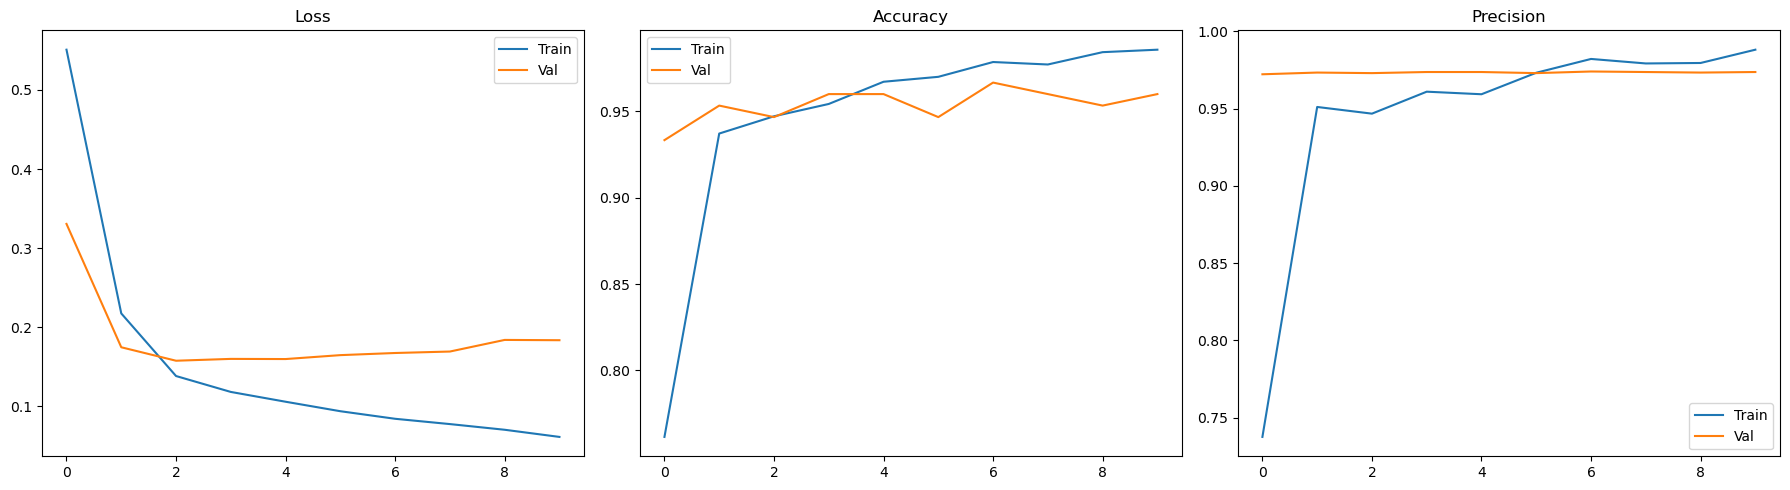

In [31]:
# plotting (and then tensrboard)
import matplotlib.pyplot as plt
#from torch.utils.tensorboard import SummaryWriter

# --- Plotting ---
def plot_history(history):
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    
    axs[0].plot(history["train_loss"], label="Train")
    axs[0].plot(history["val_loss"], label="Val")
    axs[0].set_title("Loss")
    axs[0].legend()

    if "train_accuracy" in history:
        axs[1].plot(history["train_accuracy"], label="Train")
        axs[1].plot(history["val_accuracy"], label="Val")
        axs[1].set_title("Accuracy")
        axs[1].legend()

    if "train_precision" in history:
        axs[2].plot(history["train_precision"], label="Train")
        axs[2].plot(history["val_precision"], label="Val")
        axs[2].set_title("Precision")
        axs[2].legend()

    plt.tight_layout()
    plt.show()

plot_history(history)


In [32]:
# better way (implementing a class)

In [33]:
class TrainingLogger:
    def __init__(self, metric_names):
        # metric_names: list or iterable of metric keys expected in each epoch
        self.history = {
            'train_loss': [],
            'val_loss': [],
            **{f"train_{name}": [] for name in metric_names},
            **{f"val_{name}": [] for name in metric_names}
        }

    def log_epoch(self, train_loss, val_loss, train_metrics=None, val_metrics=None):
        self.history['train_loss'].append(train_loss)
        self.history['val_loss'].append(val_loss)

        if train_metrics:
            for name, value in train_metrics.items():
                self.history[f'train_{name}'].append(value)
        else:
            # Append None or skip? Here we append None to keep history lengths consistent
            for name in self.metric_names:
                self.history[f'train_{name}'].append(None)

        if val_metrics:
            for name, value in val_metrics.items():
                self.history[f'val_{name}'].append(value)
        else:
            for name in self.metric_names:
                self.history[f'val_{name}'].append(None)

    def print_epoch(self, epoch):
        train_loss = self.history['train_loss'][-1]
        val_loss = self.history['val_loss'][-1]

        train_metrics_str = ", ".join(
            f"{name}: {self.history[f'train_{name}'][-1]:.4f}"
            for name in self.metric_names
            if self.history[f'train_{name}'][-1] is not None
        )
        val_metrics_str = ", ".join(
            f"{name}: {self.history[f'val_{name}'][-1]:.4f}"
            for name in self.metric_names
            if self.history[f'val_{name}'][-1] is not None
        )

        print(f"Epoch {epoch:02d} | Train Loss: {train_loss:.4f} {train_metrics_str} | "
              f"Val Loss: {val_loss:.4f} {val_metrics_str}")

    @property
    def metric_names(self):
        # Extract metric names from history keys (train_*)
        # Assuming all train_ and val_ metrics have the same keys
        return [k[6:] for k in self.history if k.startswith('train_')]


In [34]:
def train_model(
    model, train_loader, val_loader,
    criterion, optimizer, device,
    metrics, epochs=10
):
    

    metric_names = list(metrics.keys())  # e.g. ['accuracy', 'f1', 'precision']
    logger = TrainingLogger(metric_names)

    for epoch in range(1, epochs + 1):
        train_loss, train_metrics = train_one_epoch(model, train_loader, criterion, optimizer, device, metrics)
        val_loss, val_metrics = validate_one_epoch(model, val_loader, criterion, device, metrics)

        # Log
        logger.log_epoch(train_loss, val_loss, train_metrics, val_metrics)
        logger.print_epoch(epoch)


    return model, logger.history


In [35]:
model = BinaryClassifier().to(DEVICE)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


# 7. Run
trained_model, history = train_model(
    model, train_loader, val_loader,
    criterion, optimizer, device,
    metrics=metrics,
    epochs=20,
)

Epoch 01 | Train Loss: 0.6772 loss: 0.6772, accuracy: 0.5914, precision: 0.6280 | Val Loss: 0.6609 loss: 0.6609, accuracy: 0.6667, precision: 0.7800
Epoch 02 | Train Loss: 0.6404 loss: 0.6404, accuracy: 0.6857, precision: 0.7429 | Val Loss: 0.6251 loss: 0.6251, accuracy: 0.7400, precision: 0.8305
Epoch 03 | Train Loss: 0.6016 loss: 0.6016, accuracy: 0.7743, precision: 0.8315 | Val Loss: 0.5860 loss: 0.5860, accuracy: 0.8067, precision: 0.8657
Epoch 04 | Train Loss: 0.5567 loss: 0.5567, accuracy: 0.8329, precision: 0.8828 | Val Loss: 0.5396 loss: 0.5396, accuracy: 0.8733, precision: 0.8933
Epoch 05 | Train Loss: 0.5053 loss: 0.5053, accuracy: 0.8800, precision: 0.9100 | Val Loss: 0.4853 loss: 0.4853, accuracy: 0.8867, precision: 0.9067
Epoch 06 | Train Loss: 0.4486 loss: 0.4486, accuracy: 0.9043, precision: 0.9331 | Val Loss: 0.4292 loss: 0.4292, accuracy: 0.9067, precision: 0.9444
Epoch 07 | Train Loss: 0.3931 loss: 0.3931, accuracy: 0.9143, precision: 0.9401 | Val Loss: 0.3742 loss: 0

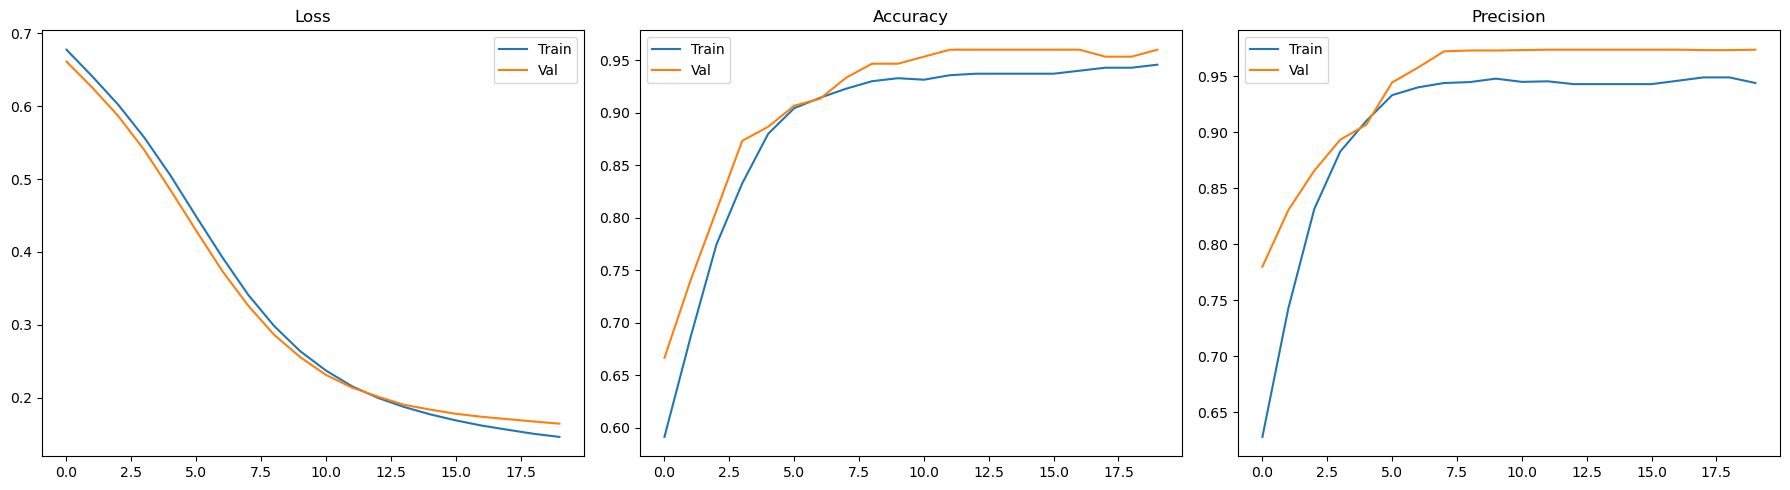

In [36]:
plot_history(history)

### Early stopping

In [38]:
def train_model(
    model, train_loader, val_loader,
    criterion, optimizer, device,
    metrics,
    early_stopping_patience=10,  # New
    epochs=10
):
    metric_names = list(metrics.keys())
    logger = TrainingLogger(metric_names)

    best_val_loss = float('inf')
    epochs_no_improve = 0
    best_model_state = None

    for epoch in range(1, epochs + 1):
        train_loss, train_metrics = train_one_epoch(model, train_loader, criterion, optimizer, device, metrics)
        val_loss, val_metrics = validate_one_epoch(model, val_loader, criterion, device, metrics)

        # Logging
        logger.log_epoch(train_loss, val_loss, train_metrics, val_metrics)
        logger.print_epoch(epoch)

        # Early Stopping
        if early_stopping_patience is not None:
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                epochs_no_improve = 0
                best_model_state = model.state_dict()  # Save best model state
            else:
                epochs_no_improve += 1
                if epochs_no_improve >= early_stopping_patience:
                    print(f"Early stopping triggered at epoch {epoch}.")
                    if best_model_state is not None:
                        model.load_state_dict(best_model_state)  # Restore best model
                    break

    return model, logger.history


In [41]:
model = BinaryClassifier().to(DEVICE)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


# 7. Run
trained_model, history = train_model(
    model, train_loader, val_loader,
    criterion, optimizer, device,
    metrics=metrics,
    early_stopping_patience=3,
    epochs=50,
)

Epoch 01 | Train Loss: 0.6354 loss: 0.6354, accuracy: 0.6700, precision: 0.7842 | Val Loss: 0.6180 loss: 0.6180, accuracy: 0.6867, precision: 0.8163
Epoch 02 | Train Loss: 0.5940 loss: 0.5940, accuracy: 0.7786, precision: 0.8333 | Val Loss: 0.5740 loss: 0.5740, accuracy: 0.7600, precision: 0.8182
Epoch 03 | Train Loss: 0.5514 loss: 0.5514, accuracy: 0.8600, precision: 0.8685 | Val Loss: 0.5293 loss: 0.5293, accuracy: 0.8400, precision: 0.8462
Epoch 04 | Train Loss: 0.5056 loss: 0.5056, accuracy: 0.8986, precision: 0.8918 | Val Loss: 0.4799 loss: 0.4799, accuracy: 0.8867, precision: 0.8675
Epoch 05 | Train Loss: 0.4559 loss: 0.4559, accuracy: 0.9257, precision: 0.9088 | Val Loss: 0.4325 loss: 0.4325, accuracy: 0.9200, precision: 0.9125
Epoch 06 | Train Loss: 0.4063 loss: 0.4063, accuracy: 0.9371, precision: 0.9226 | Val Loss: 0.3859 loss: 0.3859, accuracy: 0.9400, precision: 0.9481
Epoch 07 | Train Loss: 0.3591 loss: 0.3591, accuracy: 0.9386, precision: 0.9302 | Val Loss: 0.3440 loss: 0

Since train_model saves the best model weights in memory (best_model_state) and restores them before returning, you already get the best model ready to use when training ends.

### LR Scheduling

In [44]:
def train_model(
    model, train_loader, val_loader,
    criterion, optimizer, device,
    metrics,
    early_stopping_patience=None,
    scheduler=None,
    epochs=10
):


    metric_names = list(metrics.keys())
    logger = TrainingLogger(metric_names)

    best_val_loss = float('inf')
    epochs_no_improve = 0
    best_model_state = None

    for epoch in range(1, epochs + 1):
        model.train()
        train_loss, train_metrics = train_one_epoch(model, train_loader, criterion, optimizer, device, metrics)

        model.eval()
        val_loss, val_metrics = validate_one_epoch(model, val_loader, criterion, device, metrics)

        # Log training and validation results
        logger.log_epoch(train_loss, val_loss, train_metrics, val_metrics)

        # Log learning rate
        current_lr = optimizer.param_groups[0]['lr']
        print(f"Epoch {epoch}/{epochs} - LR: {current_lr:.6f}")
        logger.print_epoch(epoch)

        # Scheduler step
        if scheduler is not None:
            if isinstance(scheduler, torch.optim.lr_scheduler.ReduceLROnPlateau):
                scheduler.step(val_loss)
            else:
                scheduler.step()

        # Early stopping
        if early_stopping_patience is not None:
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                epochs_no_improve = 0
                best_model_state = model.state_dict()
                torch.save(model.state_dict(), 'best_model.pth')  # Optional: save to disk
            else:
                epochs_no_improve += 1
                if epochs_no_improve >= early_stopping_patience:
                    print(f"Early stopping triggered at epoch {epoch}.")
                    if best_model_state is not None:
                        model.load_state_dict(best_model_state)
                    break

    return model, logger.history


In [49]:
def train_model(
    model, train_loader, val_loader,
    criterion, optimizer, device,
    metrics,
    early_stopping_patience=None,
    scheduler=None,
    epochs=10
):
    import torch

    metric_names = list(metrics.keys())
    logger = TrainingLogger(metric_names)

    best_val_loss = float('inf')
    epochs_no_improve = 0
    best_model_state = None

    for epoch in range(1, epochs + 1):
        model.train()
        train_loss, train_metrics = train_one_epoch(model, train_loader, criterion, optimizer, device, metrics)

        model.eval()
        val_loss, val_metrics = validate_one_epoch(model, val_loader, criterion, device, metrics)

        # Log training and validation results
        logger.log_epoch(train_loss, val_loss, train_metrics, val_metrics)

        # Log learning rate
        current_lr = optimizer.param_groups[0]['lr']
        print(f"Epoch {epoch}/{epochs} - LR: {current_lr:.6f}")
        logger.print_epoch(epoch)

        # Scheduler step (standard schedulers like StepLR, CosineAnnealingLR, etc.)
        if scheduler is not None:
            scheduler.step()

        # Early stopping based on val_loss
        if early_stopping_patience is not None:
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                epochs_no_improve = 0
                best_model_state = model.state_dict()
                torch.save(model.state_dict(), 'best_model.pth')  # Optional
            else:
                epochs_no_improve += 1
                if epochs_no_improve >= early_stopping_patience:
                    print(f"Early stopping triggered at epoch {epoch}.")
                    if best_model_state is not None:
                        model.load_state_dict(best_model_state)
                    break

    return model, logger.history


In [54]:

model = BinaryClassifier().to(DEVICE)

#scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=2)


criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01) # to prove lr scheulder
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

#The StepLR scheduler adjusts the learning rate every step_size epochs

# 7. Run
trained_model, history = train_model(
    model, train_loader, val_loader,
    criterion, optimizer, device,
    metrics=metrics,
    early_stopping_patience=20,
    scheduler=scheduler,
    epochs=50,
)



Epoch 1/50 - LR: 0.010000
Epoch 01 | Train Loss: 0.5289 loss: 0.5289, accuracy: 0.7529, precision: 0.6886 | Val Loss: 0.3159 loss: 0.3159, accuracy: 0.9267, precision: 0.9718
Epoch 2/50 - LR: 0.010000
Epoch 02 | Train Loss: 0.2179 loss: 0.2179, accuracy: 0.9257, precision: 0.9527 | Val Loss: 0.1734 loss: 0.1734, accuracy: 0.9600, precision: 0.9737
Epoch 3/50 - LR: 0.010000
Epoch 03 | Train Loss: 0.1423 loss: 0.1423, accuracy: 0.9386, precision: 0.9405 | Val Loss: 0.1740 loss: 0.1740, accuracy: 0.9533, precision: 0.9733
Epoch 4/50 - LR: 0.010000
Epoch 04 | Train Loss: 0.1227 loss: 0.1227, accuracy: 0.9557, precision: 0.9695 | Val Loss: 0.1675 loss: 0.1675, accuracy: 0.9533, precision: 0.9733
Epoch 5/50 - LR: 0.010000
Epoch 05 | Train Loss: 0.1043 loss: 0.1043, accuracy: 0.9686, precision: 0.9703 | Val Loss: 0.1709 loss: 0.1709, accuracy: 0.9533, precision: 0.9733
Epoch 6/50 - LR: 0.001000
Epoch 06 | Train Loss: 0.0905 loss: 0.0905, accuracy: 0.9743, precision: 0.9791 | Val Loss: 0.1719 

### Training in detail

In [62]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

class SimpleLinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1, bias=False)  # 1 weight

    def forward(self, x):
        return self.linear(x)

criterion = nn.MSELoss(reduction='mean')

inputs = torch.tensor([[1.0], [2.0], [3.0], [4.0]])
labels = torch.tensor([[2.0], [2.0], [2.0], [2.0]])

dataset = TensorDataset(inputs, labels)
dataloader = DataLoader(dataset, batch_size=2)  # batch size 2

device = torch.device("cpu")

model = SimpleLinearModel().to(device)
with torch.no_grad():
    model.linear.weight.fill_(1.0)  # w = 1.0

optimizer = optim.SGD(model.parameters(), lr=0.1)

def train_one_epoch(model, dataloader, criterion, optimizer, device, metrics=None):
    model.train()
    running_loss, total_samples = 0.0, 0
    weight_after_first_batch = None

    for i, (inputs, labels) in enumerate(dataloader):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        batch_size = labels.size(0)
        running_loss += loss.item() * batch_size
        total_samples += batch_size

        if i == 0:
            # Capture the weight right after first batch update
            weight_after_first_batch = model.linear.weight.item()

    avg_loss = running_loss / total_samples
    return avg_loss, running_loss, weight_after_first_batch

avg_loss, rl, w_after_first = train_one_epoch(model, dataloader, criterion, optimizer, device)
print(f"Average loss: {avg_loss:.4f}")
print(f"Running loss: {rl:.4f}")
print(f"Weight after first batch update: {w_after_first:.4f}")


Average loss: 2.1125
Running loss: 8.4500
Weight after first batch update: 1.1000


In [ ]:
#https://chatgpt.com/c/68929274-fe08-832f-86e9-11dedb9b6e68

# y_pred = w*x

### Add a test performance

let's remember the purpose of the val and test sets

|                              | **Validation Set**                                     | **Test Set**                           |
| ---------------------------- | ------------------------------------------------------ | -------------------------------------- |
| ✅ **Purpose**                | Tune model (monitor overfitting, early stopping, etc.) | Final performance evaluation           |
| 🔁 **Used During Training?** | Yes (after each epoch)                                 | ❌ Never used during training or tuning |
| 📉 **Affects Learning?**     | Yes (e.g., early stopping, LR sched)                   | No — used **once at the end**          |
| 📌 **Best Practice**         | Used for model selection                               | Used for final reporting only          |